In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
from sklearn.neighbors import KNeighborsRegressor 
from sklearn import preprocessing
import seaborn as sns

In [2]:
df = pd.read_csv("spotify_top_charts_22.csv")

In [3]:
df

,uri,artist_names,track_name,peak_rank,weeks_on_chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms
0,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,1,65,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,80.870,4,238805
1,spotify:track:5PjdY0CKGZdEuoNab3yDmX,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),1,37,0.591,0.764,1,-5.484,1,0.0483,0.0383,0.000000,0.1030,169.928,4,141806
2,spotify:track:3IAfUEeaXRX9s9UdKOJrFI,Anitta,Envolver,3,3,0.812,0.736,4,-5.421,0,0.0833,0.1520,0.002540,0.0914,91.993,4,193806
3,spotify:track:1HhNoOuqm1a5MXYEgAFl8o,"Imagine Dragons, JID, Arcane, League of Legends",Enemy (with JID) - from the series Arcane Leag...,3,21,0.728,0.783,11,-4.424,0,0.2660,0.2370,0.000000,0.4340,77.011,4,173381
4,spotify:track:4fouWK6XVHhzl78KzQ1UjL,GAYLE,abcdefu,1,19,0.695,0.540,4,-5.692,1,0.0493,0.2990,0.000000,0.3670,121.932,4,168602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,spotify:track:0So2sgVa8aJiARPl2P29u2,SALES,Pope Is a Rockstar,108,5,0.725,0.446,4,-8.958,0,0.0287,0.8500,0.243000,0.1070,90.024,4,187333
642,spotify:track:1TUuhV75FeOF6UObRsABo2,Morgan Wallen,Don't Think Jesus,96,1,0.578,0.431,2,-7.034,1,0.0269,0.4690,0.000000,0.1370,116.979,3,226975
643,spotify:track:3GbQcjKWT7eVpUfzqwUjxv,"Lil Nas X, YoungBoy Never Broke Again",Late To Da Party (F*CK BET) (feat. YoungBoy Ne...,86,1,0.872,0.422,1,-7.415,0,0.3630,0.0254,0.000000,0.1090,149.956,4,180666
644,spotify:track:7My9ca9QEIR8MvIOdIrTWA,"Eminem, Snoop Dogg",From The D 2 The LBC (with Snoop Dogg),135,1,0.730,0.785,9,-7.986,0,0.2430,0.1050,0.000000,0.0445,82.037,4,215120


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uri               646 non-null    object 
 1   artist_names      646 non-null    object 
 2   track_name        646 non-null    object 
 3   peak_rank         646 non-null    int64  
 4   weeks_on_chart    646 non-null    int64  
 5   danceability      646 non-null    float64
 6   energy            646 non-null    float64
 7   key               646 non-null    int64  
 8   loudness          646 non-null    float64
 9   mode              646 non-null    int64  
 10  speechiness       646 non-null    float64
 11  acousticness      646 non-null    float64
 12  instrumentalness  646 non-null    float64
 13  liveness          646 non-null    float64
 14  tempo             646 non-null    float64
 15  time_signature    646 non-null    int64  
 16  duration_ms       646 non-null    int64  
dt

In [5]:
df.isnull().sum()

uri                 0
artist_names        0
track_name          0
peak_rank           0
weeks_on_chart      0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
tempo               0
time_signature      0
duration_ms         0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,peak_rank,weeks_on_chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms
count,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000
mean,65.922601,19.498452,0.674426,0.640836,5.086687,-6.356034,0.577399,0.109797,0.255699,0.013686,0.176478,121.091571,3.927245,203629.859133
std,57.004503,37.813937,0.151527,0.165478,3.622314,2.627462,0.494356,0.102167,0.262595,0.077836,0.133792,28.267951,0.351256,54966.666438
min,1.000000,1.000000,0.193000,0.021800,0.000000,-31.160000,0.000000,0.023200,0.000017,0.000000,0.026400,66.165000,1.000000,36935.000000
25%,15.000000,1.000000,0.569000,0.532500,1.000000,-7.716250,0.000000,0.041325,0.040400,0.000000,0.093100,98.428500,4.000000,169901.500000
50%,51.500000,5.000000,0.700000,0.652000,5.000000,-5.930500,1.000000,0.063450,0.155500,0.000002,0.120000,119.966000,4.000000,196388.500000
75%,108.750000,19.750000,0.790750,0.769000,8.000000,-4.595750,1.000000,0.135750,0.424500,0.000105,0.231750,139.968250,4.000000,229213.500000
max,200.000000,269.000000,0.985000,0.972000,11.000000,-0.514000,1.000000,0.611000,0.969000,0.908000,0.968000,205.863000,5.000000,613027.000000


<AxesSubplot:>

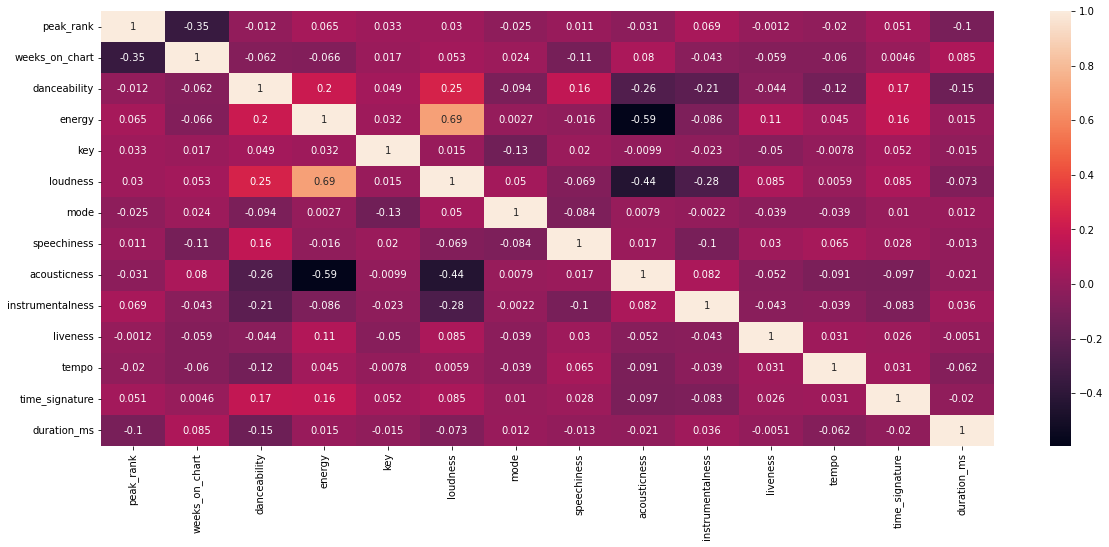

In [8]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True)

In [9]:
corr_df = df[['danceability', 'energy', 'loudness', 'speechiness',
                      'acousticness', 'instrumentalness', 'liveness', 'tempo', 'time_signature',
                     'weeks_on_chart', ]].corr(method="pearson")

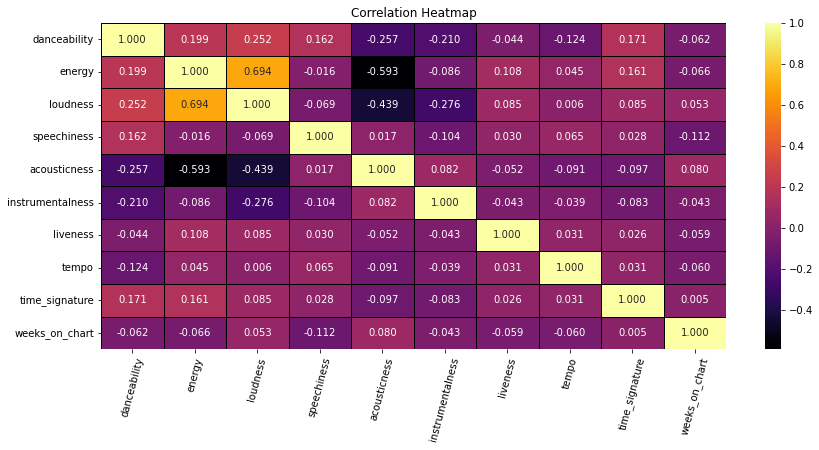

In [10]:
plt.figure(figsize=(14,6))
heatmap=sns.heatmap(corr_df, annot=True, fmt=".3f", cmap="inferno", linewidths=1, linecolor="Black")
heatmap.set_title("Correlation Heatmap")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=75);

In [11]:
corr_df[['weeks_on_chart']]

,weeks_on_chart
danceability,-0.062471
energy,-0.065588
loudness,0.053077
speechiness,-0.111900
acousticness,0.079944
instrumentalness,-0.042685
liveness,-0.058650
tempo,-0.059967
time_signature,0.004602
weeks_on_chart,1.000000


In [16]:
from sklearn.model_selection import train_test_split

train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (387, 17)
val_df.shape : (129, 17)
test_df.shape : (130, 17)


In [17]:
select_cols = list(train_df[['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                    'acousticness', 'instrumentalness', 'liveness', 'tempo', 'time_signature',]])
target_col = 'weeks_on_chart'

In [18]:
train_in = train_df[select_cols].copy()
train_targets = train_df[target_col].copy()
val_in = val_df[select_cols].copy()
val_targets = val_df[target_col].copy()
test_in = test_df[select_cols].copy()
test_targets = test_df[target_col].copy()

In [19]:
train_in

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature
150,263400,0.599,0.448,8,-6.312,1,0.0232,0.16300,0.000000,0.1060,95.050,3
201,167303,0.520,0.731,6,-5.338,0,0.0557,0.34200,0.001010,0.3110,173.930,4
435,202285,0.852,0.421,10,-9.153,0,0.2080,0.42800,0.000002,0.1060,95.977,4
142,202227,0.652,0.583,2,-8.302,1,0.3220,0.01650,0.000002,0.0420,180.042,4
468,182227,0.563,0.756,0,-3.852,0,0.0579,0.19600,0.000000,0.2450,100.012,4
...,...,...,...,...,...,...,...,...,...,...,...,...
613,129965,0.826,0.276,11,-11.227,0,0.2660,0.62000,0.000085,0.1180,123.985,4
638,185213,0.878,0.575,9,-8.732,1,0.2840,0.00293,0.000000,0.2730,144.918,4
59,189333,0.746,0.844,11,-3.499,0,0.0359,0.06200,0.000000,0.1490,123.014,4
379,162604,0.787,0.833,8,-4.403,1,0.0478,0.01800,0.007470,0.0374,123.970,4


In [83]:
numeric_cols = list(train_in[['duration_ms', 'danceability', 'energy', 'loudness','speechiness',
                    'acousticness', 'instrumentalness', 'liveness', 'tempo']])
categorical_cols = list(train_in[['key', 'mode', 'time_signature']])
train_in[categorical_cols].nunique()

key               12
mode               2
time_signature     4
dtype: int64

In [84]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
categorical_cols

['key', 'mode', 'time_signature']

In [85]:
encoder.fit(train_in[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [86]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
train_in[encoded_cols] = encoder.transform(train_in[categorical_cols])
train_in

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5
150,263400,0.599,0.448,8,-6.312,1,0.0232,0.16300,0.000000,0.1060,95.050,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
201,167303,0.520,0.731,6,-5.338,0,0.0557,0.34200,0.001010,0.3110,173.930,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
435,202285,0.852,0.421,10,-9.153,0,0.2080,0.42800,0.000002,0.1060,95.977,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
142,202227,0.652,0.583,2,-8.302,1,0.3220,0.01650,0.000002,0.0420,180.042,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
468,182227,0.563,0.756,0,-3.852,0,0.0579,0.19600,0.000000,0.2450,100.012,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,129965,0.826,0.276,11,-11.227,0,0.2660,0.62000,0.000085,0.1180,123.985,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
638,185213,0.878,0.575,9,-8.732,1,0.2840,0.00293,0.000000,0.2730,144.918,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
59,189333,0.746,0.844,11,-3.499,0,0.0359,0.06200,0.000000,0.1490,123.014,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
379,162604,0.787,0.833,8,-4.403,1,0.0478,0.01800,0.007470,0.0374,123.970,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [87]:
X_train = train_in[numeric_cols + encoded_cols]
pd.set_option('display.max_columns', None)
X_train

,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5
150,263400,0.599,0.448,-6.312,0.0232,0.16300,0.000000,0.1060,95.050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
201,167303,0.520,0.731,-5.338,0.0557,0.34200,0.001010,0.3110,173.930,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
435,202285,0.852,0.421,-9.153,0.2080,0.42800,0.000002,0.1060,95.977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
142,202227,0.652,0.583,-8.302,0.3220,0.01650,0.000002,0.0420,180.042,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
468,182227,0.563,0.756,-3.852,0.0579,0.19600,0.000000,0.2450,100.012,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,129965,0.826,0.276,-11.227,0.2660,0.62000,0.000085,0.1180,123.985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
638,185213,0.878,0.575,-8.732,0.2840,0.00293,0.000000,0.2730,144.918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
59,189333,0.746,0.844,-3.499,0.0359,0.06200,0.000000,0.1490,123.014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
379,162604,0.787,0.833,-4.403,0.0478,0.01800,0.007470,0.0374,123.970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
linear = LinearRegression()
linear.fit(X_train, train_targets)

LinearRegression()

In [90]:
from sklearn.metrics import r2_score, mean_squared_error

def model_evaluator(targets, preds):
    
    rmse = round(mean_squared_error(targets, preds, squared= False),2)
    r2 = round(r2_score(targets, preds),2)
    
    return {'RMSE': rmse,
            'RSquared ': r2
            }

In [93]:
linear_preds = linear.predict(X_train)
model_evaluator(train_targets, linear_preds)

{'RMSE': 35.98, 'RSquared ': 0.11}

In [94]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
rf.fit(X_train, train_targets)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [95]:
rf_preds = rf.predict(X_train)
rf_preds

array([175.79,  20.23,  26.15,  20.91,   4.05,  12.13,   5.88,   8.54,
        75.26,  15.68,  56.34,   9.11,  21.22,  38.53,  21.87,   4.07,
        11.51,  14.13,  13.09,   2.62,  12.45,   8.95,  34.83,  26.52,
       194.32,  14.1 ,   5.48,  13.69,   2.28,  53.07,  24.88,  16.43,
        12.62,  11.41,  12.73,  22.86,  12.85,  10.78,   7.08,  22.42,
         8.47,  35.6 ,   7.04,   5.5 ,  14.33,   5.95,  54.52,   6.18,
        30.26,  51.95,  11.93,  15.03,  17.86,   3.65,   3.57,   7.  ,
        35.48, 114.24,  56.23,  13.27,  61.61,  28.32,   5.92,   3.23,
         6.19,  15.23,  15.82,  31.42,  12.32,   7.38,   3.97,  20.89,
         9.34,   3.76,   9.9 ,  33.01,  18.26,  67.55,   8.67,  25.05,
        38.73,   7.26,   5.56,  28.46,  33.79,   4.43,  10.1 ,   7.35,
        42.89,   3.06,   9.56,  11.  ,  30.77,  16.19,  11.27,   4.67,
         4.18,  49.27,  17.68,  14.06,   5.16,  21.69,   7.2 ,   6.27,
         6.67,   8.97,   8.17,   9.03,   7.59,  63.3 ,   6.12,  35.45,
      

In [96]:
model_evaluator(train_targets, rf_preds)

{'RMSE': 14.51, 'RSquared ': 0.85}

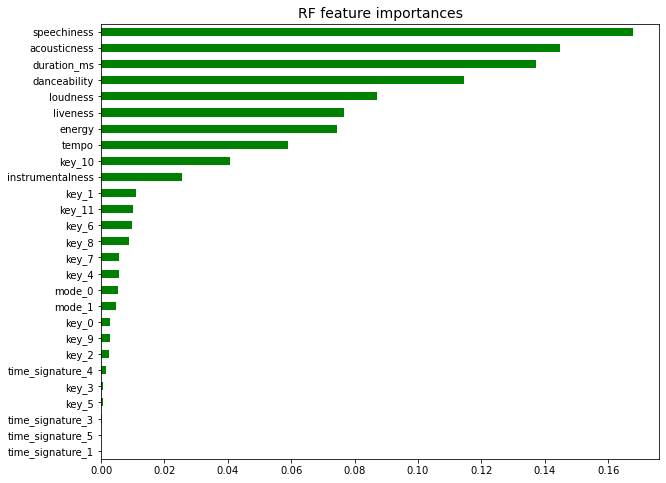

In [97]:
import pandas as pd
important = pd.Series(data=rf.feature_importances_, index=X_train.columns).sort_values()

fig = plt.subplots(figsize=(10,8))
_ = important.plot(kind='barh',color = 'green')
_ = plt.title('RF feature importances', fontsize=14)

In [72]:
df_quantitative = df
cols_to_drop = []
for column in df:
    if df[column].dtype == 'object':
        cols_to_drop.append(column)
df_quantitative = df.drop(columns=cols_to_drop)
print(f"Working dataset shape: {df_quantitative}")

Working dataset shape:      peak_rank  weeks_on_chart  danceability  energy  key  loudness  mode  \
0            1              65         0.761   0.525   11    -6.900     1   
1            1              37         0.591   0.764    1    -5.484     1   
2            3               3         0.812   0.736    4    -5.421     0   
3            3              21         0.728   0.783   11    -4.424     0   
4            1              19         0.695   0.540    4    -5.692     1   
..         ...             ...           ...     ...  ...       ...   ...   
641        108               5         0.725   0.446    4    -8.958     0   
642         96               1         0.578   0.431    2    -7.034     1   
643         86               1         0.872   0.422    1    -7.415     0   
644        135               1         0.730   0.785    9    -7.986     0   
645        152               1         0.476   0.189   11   -13.777     0   

     speechiness  acousticness  instrumentalness  li

In [73]:
df_quan_nm=(df_quantitative-df_quantitative.min())/(df_quantitative.max()-df_quantitative.min())

In [74]:
np.random.seed(1) 
df_train_full = df_quan_nm.sample(frac=0.8,random_state=1)
df_test = df_quan_nm.drop(df_train_full.index)
df_validation = df_train_full.sample(frac=0.2,random_state=2)
df_train = df_train_full.drop(df_validation.index)

In [75]:
predict = "weeks_on_chart"
X_train = df_train.drop(columns=[predict])
X_validation = df_validation.drop(columns=[predict])
X_test = df_test.drop(columns=[predict])
Y_train = df_train[[predict]].values.ravel()
Y_validation = df_train[[predict]].values.ravel()
Y_test = df_train[[predict]].values.ravel()

In [76]:
def calculate_error(Y_pred, Y_actual):
    error = 0
    for i in range(len(Y_pred)):
        error += abs(Y_pred[i] - Y_actual[i])**2
    return error / len(Y_pred)

In [77]:
k_errors = [np.inf] 
for k in range(1,50):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, Y_train) 
    Y_val_pred = model.predict(X_validation)
    k_errors.append(calculate_error(Y_val_pred, Y_validation))

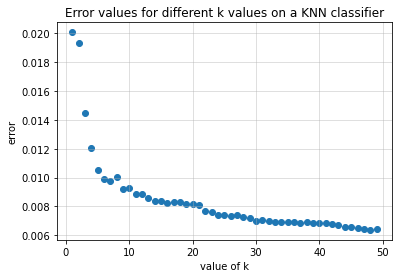

In [78]:
if not os.path.exists('figs'):
    os.makedirs('figs')

plt.scatter(x=range(len(k_errors)), 
            y=k_errors)
plt.xlabel('value of k')
plt.ylabel('error')
plt.title('Error values for different k values on a KNN classifier')
plt.grid(axis='both',alpha=0.5)

In [79]:
k=10
model = KNeighborsRegressor(n_neighbors=k)
model.fit(X_train, Y_train) 
Y_pred = model.predict(X_test)
print(f"Our testing error is {calculate_error(Y_pred, Y_test)}\n\n")

Our testing error is 0.009559899651344114


